<img src="img/Auswahl_2016-05-12_001.png"/>

### Groupname: Gruppe 5

<table align="left" style="border-style: hidden; border-collapse: collapse">
  <tr>
    <td>Arne Siebenmorgen</td>
    <td>330529</td>
  </tr>
  <tr>
    <td>Holger Prang </td>
    <td>WM</td>
  </tr>
  <tr>
    <td>Eugene Reese</td>
    <td>319776</td>
  </tr>
  <tr>
    <td>Jens Meiners</td>
    <td>332697</td>
  </tr>
</table>

In [1]:
%matplotlib inline  
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
from scipy import misc

In [2]:
def pca(data, axis=0, center=True, normalize=False):
    mu = data.mean(axis=axis)
    if center:
        data = data - mu
    if normalize:
        data = (data - mu)/data.std(axis=0)
    eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
    return eigenvectors, eigenvalues

def project(data, eigenvectors, axis=0):
    projected_data = np.dot(data, eigenvectors)
    sigma = projected_data.std(axis=axis).mean()
    return projected_data, sigma

<img src="img/Auswahl_2016-05-12_002.png"/>

<img src="img/Auswahl_2016-05-12_003.png"/>

<img src="img/Auswahl_2016-05-12_004.png"/>

In [13]:
img = scipy.misc.imread('imgpca/n9.jpg')

imgCrop = img[10:10+320, 50:50+160]

imgSamples = np.zeros(shape=(((imgCrop.shape[0]*imgCrop.shape[1])/(20*10),20*10)))

for i in range(imgSamples.shape[0]):
    xIndex = (i%(((imgCrop.shape[0]+1))/20))*20
    yIndex = (i/(((imgCrop.shape[0]+1))/20))*10
    imgSample = imgCrop[xIndex:xIndex+20,yIndex:yIndex+10]
    imgSamples[i] = imgSample.ravel()

<img src="img/Auswahl_2016-05-12_005.png"/>

In [14]:
#do SVD
eigenvectors, eigenvalues, V = np.linalg.svd(imgSamples, full_matrices=False)

<img src="img/Auswahl_2016-05-12_006.png"/>

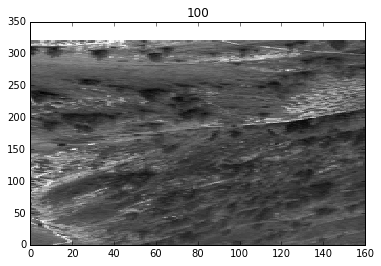

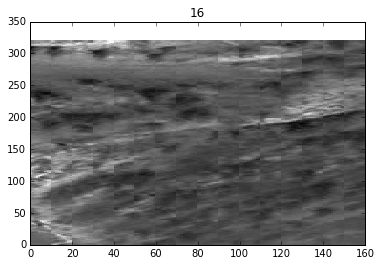

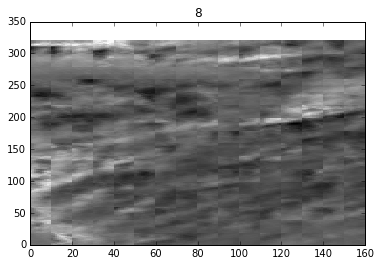

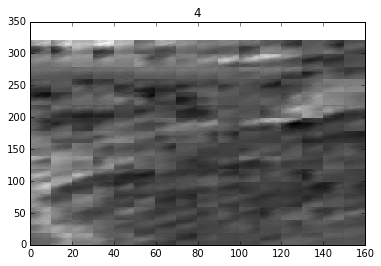

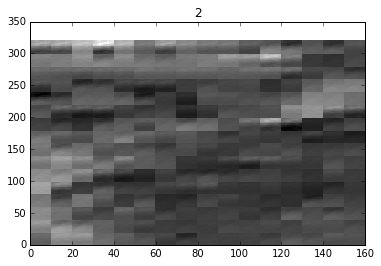

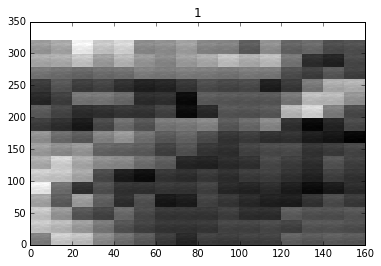

In [15]:
def stichImg(imageShape, imgData):    
    imgStich = np.zeros(imageShape)
    for i in range(imgData.shape[0]):
        xIndex = (i%(((imageShape[0]+1))/20))*20
        yIndex = (i/(((imageShape[0]+1))/20))*10
        #print xIndex, yIndex
        imgSample = imgData[i].reshape((20,10))
        imgStich[xIndex:xIndex+20,yIndex:yIndex+10] = imgSample        
    return imgStich

nDef = [100,16,8,4,2,1]
eigenvaluesComp = eigenvalues
for n in nDef:
    eigenvaluesComp[n:] = 0
    pcaData = np.dot(eigenvectors, np.dot(np.diag(eigenvaluesComp), V))
    stich = stichImg(imgCrop.shape,pcaData)
    plt.pcolor(stich, cmap=plt.get_cmap('gray'))
    plt.title(n)
    plt.show()

<img src="img/Auswahl_2016-05-12_007.png"/>

<img src="img/Auswahl_2016-05-12_008.png"/>

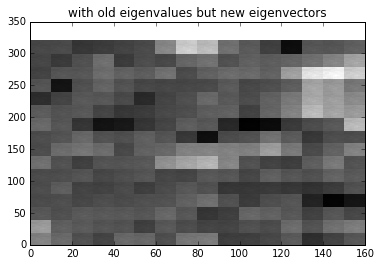

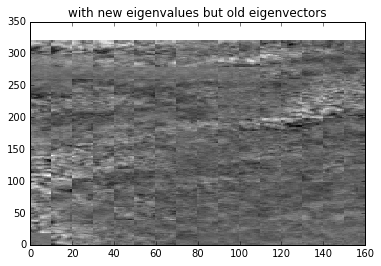

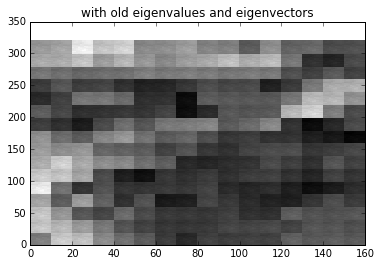

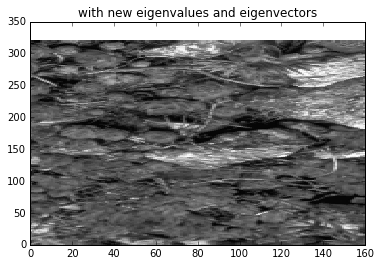

In [7]:
img2 = scipy.misc.imread('imgpca/n4.jpg')
imgCrop2 = img2[10:10+320, 50:50+160]
imgSamples2 = np.zeros(shape=(((imgCrop2.shape[0]*imgCrop2.shape[1])/(20*10),20*10)))
for i in range(imgSamples2.shape[0]):
    xIndex = (i%(((imgCrop2.shape[0]+1))/20))*20
    yIndex = (i/(((imgCrop2.shape[0]+1))/20))*10
    imgSample2 = imgCrop2[xIndex:xIndex+20,yIndex:yIndex+10]
    imgSamples2[i] = imgSample2.ravel()
    
eigenvectors2, eigenvalues2, V2 = np.linalg.svd(imgSamples2, full_matrices=False)

pcaData2 = np.dot(eigenvectors2, np.dot(np.diag(eigenvalues), V2))
stich = stichImg(imgCrop2.shape,pcaData2)
plt.pcolor(stich, cmap=plt.get_cmap('gray'))
plt.title('with old eigenvalues but new eigenvectors')
plt.show()

pcaData2 = np.dot(eigenvectors, np.dot(np.diag(eigenvalues2), V2))
stich = stichImg(imgCrop2.shape,pcaData2)
plt.pcolor(stich, cmap=plt.get_cmap('gray'))
plt.title('with new eigenvalues but old eigenvectors')
plt.show()

pcaData2 = np.dot(eigenvectors, np.dot(np.diag(eigenvalues), V2))
stich = stichImg(imgCrop2.shape,pcaData2)
plt.pcolor(stich, cmap=plt.get_cmap('gray'))
plt.title('with old eigenvalues and eigenvectors')
plt.show()

pcaData2 = np.dot(eigenvectors2, np.dot(np.diag(eigenvalues2), V2))
stich = stichImg(imgCrop2.shape,pcaData2)
plt.pcolor(stich, cmap=plt.get_cmap('gray'))
plt.title('with new eigenvalues and eigenvectors')
plt.show()

<img src="img/Auswahl_2016-05-12_009.png"/>

<img src="img/Auswahl_2016-05-12_010.png"/>

<img src="img/Auswahl_2016-05-12_011.png"/>

<img src="img/Auswahl_2016-05-12_012.png"/>

<img src="img/Auswahl_2016-05-12_013.png"/>